In [3]:
import pandas as pd
import numpy as np
import os
root = os.getcwd()
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math 
from sklearn.metrics import r2_score
# 将二维数组展平为一维数组
print(root)

/root/autodl-tmp


In [4]:
import pandas as pd
import numpy as np
import os
root = os.getcwd()
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
from sklearn.metrics import r2_score
# 将二维数组展平为一维数组
print(root)

import pickle

# 读取pkl文件,rb是读取二进制文件，而r是读取文本文件
file = open('US101_Lane1to5_t1.5s30.pickle', 'rb')
info = pickle.load(file)
speed = np.around(info['vMat'].T,4)
density = np.round(info['rhoMat'].T,4)

flat_array1 = speed.flatten()
flat_array2 = density.flatten()

# 创建DataFrame
df = pd.DataFrame({'speed': flat_array1, 'density': flat_array2})

df2 = df.sort_values(by=['density'], ascending=[True])
df2 = df2.reset_index()
k = list(df2.loc[:, 'density'])

omega_values_list = []


# 定义函数计算 omega_i，并将结果添加到 omega_values_list 中
def calculate_omega(k, max_index):
    # new_max_index = np.argmin([i == k[max_index] for i in k])
    indices = [i for i, v in enumerate(k) if v == k[max_index]]
    # 从这些元素中找到序号最大的一个
    new_max_index = max(indices)

    if new_max_index < len(k)-1:
        if max_index == 0:
            omega_i = (k[new_max_index+1] - k[0]) / (len(indices))
            omega_values = [omega_i] * (len(indices))
            omega_values_list.append(omega_values)
        else:
            omega_i = (k[new_max_index+1] - k[max_index-1]) / (2 * (len(indices)))
            omega_values = [omega_i] * (len(indices))
            omega_values_list.append(omega_values)
    else:
        omega_i = (k[len(k) - 1] - k[max_index - 1]) / (2 * (len(indices)))
        omega_values = [omega_i] * (len(indices))
        omega_values_list.append(omega_values)
    return new_max_index


# 设置初始的 max_index
max_index = 0

# 循环执行计算，直到 max_index 达到 len(k)
while max_index < len(k):
    new_max_index = calculate_omega(k, max_index)
    max_index =  new_max_index + 1

# 取消嵌套的列表
flat_list = [item for sublist in omega_values_list for item in sublist]

df2['weight'] = flat_list

/root/autodl-tmp


In [5]:
# 按百分位标定
import numpy as np
from scipy.optimize import minimize

# 自定义的拟合函数
# def func2(k, vm, kj):
#     return vm * (1 - k / kj)

def func2(k, vm, kj):
    return vm*np.exp(-k/kj)

# 定义目标函数
def objective_wlsm(params, x_data, y_data, weights, alpha):
    vf, kjam = params
    y_hat = func2(x_data, vf, kjam)
    error = y_data - y_hat
    error_blow = np.where(y_data - y_hat > 0, y_hat-y_data, 0)
    weighted_error_blow = error_blow * np.sqrt(weights)
    weighted_error = error * np.sqrt(weights)
    cost = alpha * np.sum(weighted_error ** 2) + (1-2 * alpha) * np.sum(weighted_error_blow ** 2)
    return cost


# 初始参数猜测值
initial_guess = [15.0, 30.0]
vf_optimal_list = []
kjam_optimal_list =[]
rank_list = [0.01,0.08,0.15,0.22,0.29,0.36,0.43,0.50,0.57,0.64,0.71,0.78,0.85,0.92,0.99]
for alpha in rank_list:

    # 使用优化算法找到最优参数
    result_wlsm = minimize(objective_wlsm, initial_guess, args=(df2.loc[:,'density'], df2.loc[:,'speed'], df2.loc[:,'weight'],alpha))


    # 输出最优参数
    vf_optimal, kjam_optimal = result_wlsm.x
    vf_optimal_list.append(vf_optimal)
    kjam_optimal_list.append(kjam_optimal)
    print("最优参数 vf_wlsm:", vf_optimal)
    print("最优参数 kjam_wlsm:", kjam_optimal)

最优参数 vf_wlsm: 26.593289607301294
最优参数 kjam_wlsm: 0.3008858423572518
最优参数 vf_wlsm: 25.17622143967506
最优参数 kjam_wlsm: 0.2663612400543186
最优参数 vf_wlsm: 24.894857341334312
最优参数 kjam_wlsm: 0.24913421881391065
最优参数 vf_wlsm: 24.66981056555558
最优参数 kjam_wlsm: 0.23867086150815428
最优参数 vf_wlsm: 24.4427869002826
最优参数 kjam_wlsm: 0.23142022033873985
最优参数 vf_wlsm: 24.22226397211549
最优参数 kjam_wlsm: 0.22566298244491967
最优参数 vf_wlsm: 24.00172735273242
最优参数 kjam_wlsm: 0.22074512360736698
最优参数 vf_wlsm: 23.761946133683683
最优参数 kjam_wlsm: 0.2164464827918948
最优参数 vf_wlsm: 23.492558796862994
最优参数 kjam_wlsm: 0.21256456414605304
最优参数 vf_wlsm: 23.183933724474596
最优参数 kjam_wlsm: 0.20891323368622822
最优参数 vf_wlsm: 22.811498030259383
最优参数 kjam_wlsm: 0.20537749233704497
最优参数 vf_wlsm: 22.336109550702822
最优参数 kjam_wlsm: 0.20181191452237734
最优参数 vf_wlsm: 21.70630128564963
最优参数 kjam_wlsm: 0.19775829495264408
最优参数 vf_wlsm: 20.669662794402917
最优参数 kjam_wlsm: 0.19265746921786622
最优参数 vf_wlsm: 15.73904452060488
最优参数 kjam_wl

/root/miniconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


vm: 26.593289607301294 kj: 0.3008858423572518
wlsm_r2_score: -0.10
vm: 25.17622143967506 kj: 0.2663612400543186
wlsm_r2_score: 0.51
vm: 24.894857341334312 kj: 0.24913421881391065
wlsm_r2_score: 0.64
vm: 24.66981056555558 kj: 0.23867086150815428
wlsm_r2_score: 0.69
vm: 24.4427869002826 kj: 0.23142022033873985
wlsm_r2_score: 0.71
vm: 24.22226397211549 kj: 0.22566298244491967
wlsm_r2_score: 0.71
vm: 24.00172735273242 kj: 0.22074512360736698
wlsm_r2_score: 0.70
vm: 23.761946133683683 kj: 0.2164464827918948
wlsm_r2_score: 0.68
vm: 23.492558796862994 kj: 0.21256456414605304
wlsm_r2_score: 0.65
vm: 23.183933724474596 kj: 0.20891323368622822
wlsm_r2_score: 0.61
vm: 22.811498030259383 kj: 0.20537749233704497
wlsm_r2_score: 0.56
vm: 22.336109550702822 kj: 0.20181191452237734
wlsm_r2_score: 0.48
vm: 21.70630128564963 kj: 0.19775829495264408
wlsm_r2_score: 0.37
vm: 20.669662794402917 kj: 0.19265746921786622
wlsm_r2_score: 0.17
vm: 15.73904452060488 kj: 0.18923104047631178
wlsm_r2_score: -0.84


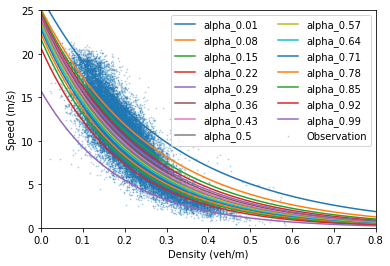

In [9]:
xx2 = np.arange(0.001, 0.8, 0.001)
x2 = df2.loc[:,'density']
y2 = df2.loc[:,'speed']
plt.scatter(x2, y2, marker='o',s=0.5,alpha=0.3,label='Observation')
for i in range(len(vf_optimal_list)):
    yy3 = func2(xx2,vf_optimal_list[i],kjam_optimal_list[i])
    yvals3 = func2(x2,vf_optimal_list[i],kjam_optimal_list[i]) #拟合y值
    print('vm:',vf_optimal_list[i],'kj:',kjam_optimal_list[i])
    print('wlsm_r2_score: %.2f'% r2_score(y2, yvals3))
    plt.plot(xx2,yy3,label="alpha_"+str(rank_list[i]))
    
plt.xlim([0,0.8])    
plt.ylim([0,25])
plt.xlabel('Density (veh/m)')
plt.ylabel('Speed (m/s)')
# plt.title('curve_fit')
plt.legend(ncol=2)
plt.savefig('calibrate.png', dpi=600)
plt.show()